In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('HousePricePrediction.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

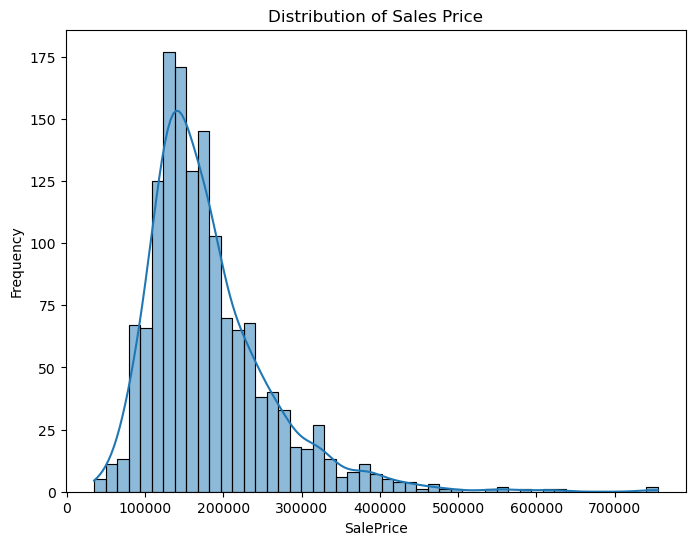

In [4]:
plt.figure(figsize=(8 ,6))
sns.histplot(df['SalePrice'] , kde = True)
plt.title('Distribution of Sales Price')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

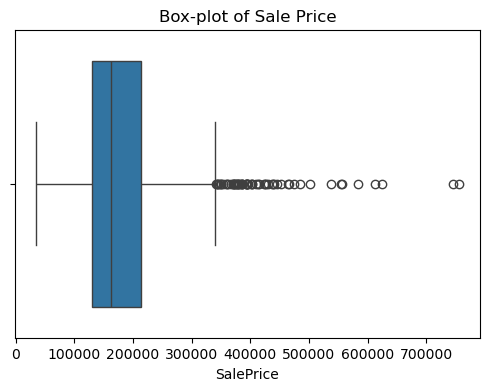

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df['SalePrice'])
plt.title('Box-plot of Sale Price')
plt.show()

In [6]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

num_outliers = ((df['SalePrice'] < lower_fence) | (df['SalePrice'] > upper_fence)).sum()
print(f'Number of Outliers: {num_outliers}')
print(f'Median of SalePrice: {df['SalePrice'].median()}')
print(f'Lower Fence: {lower_fence} , Upper Fence: {upper_fence}')

Number of Outliers: 61
Median of SalePrice: 163000.0
Lower Fence: 3937.5 , Upper Fence: 340037.5


### Observation: SalePrice Distribution

The SalePrice distribution is right-skewed, meaning most houses are in the low-to-mid price range with a few high-priced properties forming a long right tail. The median (~163,000) is lower than the mean, indicating the presence of high-value outliers. The middle 50% of prices lie between ~130,000 and ~214,000 (IQR). The boxplot shows several valid high-end outliers, representing luxury properties, which should be retained as they reflect real market behavior.

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

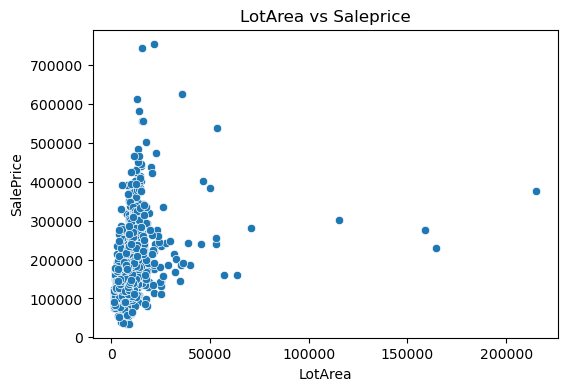

In [8]:
plt.figure(figsize=(6 , 4))
sns.scatterplot(x = df['LotArea'] , y = df['SalePrice'])
plt.title('LotArea vs Saleprice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

## Observation : LotArea vs SalePrice
Scatter plot shows positive but weak relationship with LotArea and Sale Price
Most houses have small and medium lot sizes and their prices spread accross wider range
There are some houses with very high Lot area appears as a extream outliers that do now always corrospond to outliers
In this case LotArea not affecting houses prices and alon can not be strong strong Linear predictor

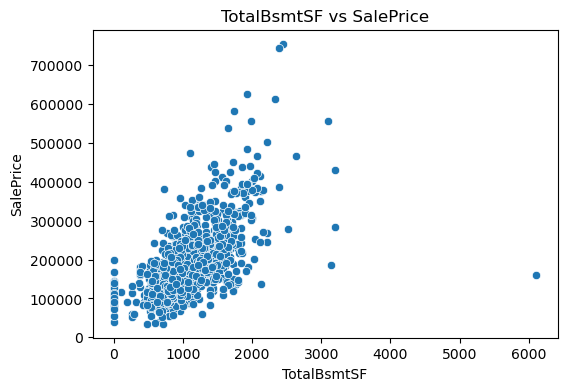

In [9]:
plt.figure(figsize=(6 , 4))
sns.scatterplot(x = df['TotalBsmtSF'] , y = df['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

## Observation: TotalBsmtSF vs SalePrice

A strong positive and nearly linear relashionship is observed between TotalBsmtSF and Sale Price
Basement Area increase and soo house price increase consistently
In TotalBsmtSF data points are more tightly clustered along an upward trend 
Fewer extream outliers are present

Total Basement area is a strong predictior of Sale Price and soo it is well suted for Linear Regression

In [10]:
number_df = df.select_dtypes(include = 'number')
number_df.head()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


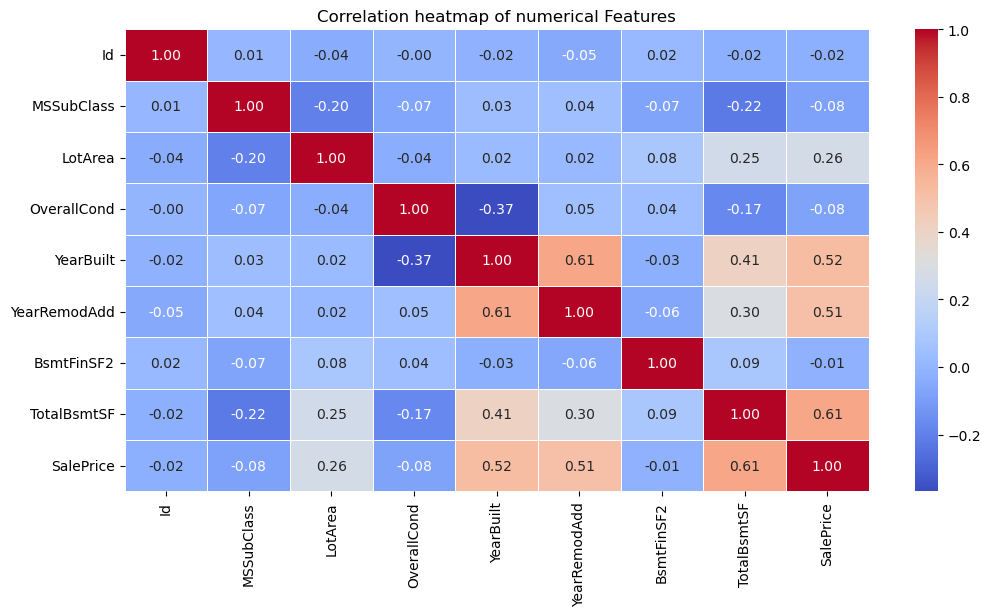

In [11]:
plt.figure(figsize = (12,6))

sns.heatmap(
    number_df.corr(),
    annot = True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths = 0.5
)

plt.title('Correlation heatmap of numerical Features')
plt.show()

## Correlation Analysis

TotalBsmtSF has a strong positive correlation with SalePrice (0.61), indicating higher prices for homes with larger basements.

YearBuilt (0.52) and YearRemodAdd (0.51) show moderate positive correlations, suggesting newer or remodeled homes tend to sell for more.

LotArea has a weak positive correlation (0.26), meaning land size alone has limited impact on price.

Most other numerical features show weak or no linear correlation with SalePrice.

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [13]:
df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending = False)

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

In [14]:
df.groupby('LotConfig')['SalePrice'].mean().sort_values(ascending = False)

LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: float64